In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# 1. Load the dataset into python environment 

In [2]:
data=pd.read_csv(r"C:\Users\SREELAKSHMI\Downloads\titanic_dataset  (1).csv")
data


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
data=pd.read_csv(r"C:\Users\SREELAKSHMI\Downloads\titanic_dataset.csv",index_col='PassengerId')
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.shape


(891, 11)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [6]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

# 2. Do all the necessary pre-processing steps

    Fill the missing values present in all the columns in the dataset

In [8]:
for col in['Age']:
    data[col]=data[col].fillna(data[col].median())

In [9]:
data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [10]:
for col in['Cabin','Embarked']:
    data[col]=data[col].fillna(data[col].mode()[0])

In [11]:
data.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

Check and handle outliers in columns in the data set

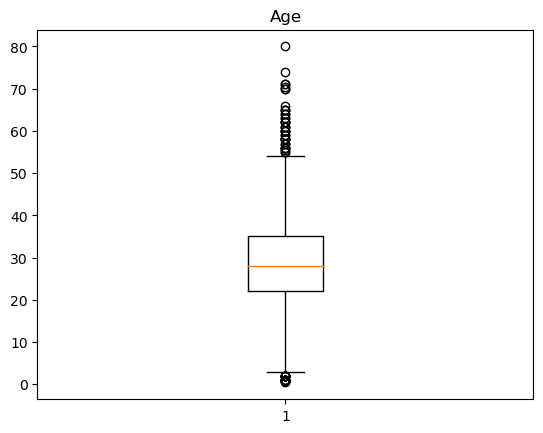

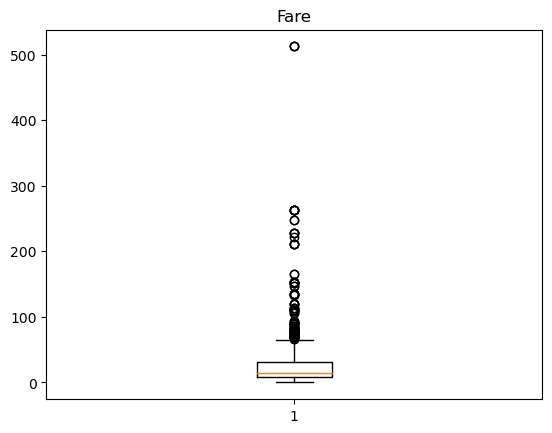

In [12]:
num_cols=[ 'Age', 'Fare']
for i in num_cols:
    plt.figure()
    plt.boxplot(data[i])
    plt.title(i)
    plt.show()

In [16]:
data1 = data.drop(columns=['Ticket', 'Cabin','Name'])

In [17]:
data1


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
887,0,2,male,27.0,0,0,13.0000,S
888,1,1,female,19.0,0,0,30.0000,S
889,0,3,female,28.0,1,2,23.4500,S


In [18]:
data1['Sex'] = data1['Sex'].map({'male':0, 'female':1})
data1['Embarked'] = data1['Embarked'].map({'C':0, 'Q':1, 'S':2})

In [19]:
data1

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,0,22.0,1,0,7.2500,2
2,1,1,1,38.0,1,0,71.2833,0
3,1,3,1,26.0,0,0,7.9250,2
4,1,1,1,35.0,1,0,53.1000,2
5,0,3,0,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
887,0,2,0,27.0,0,0,13.0000,2
888,1,1,1,19.0,0,0,30.0000,2
889,0,3,1,28.0,1,2,23.4500,2


# KNN model Creation

In [20]:
data1['Survived'].unique()

array([0, 1], dtype=int64)

In [21]:
data1['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [23]:
x=data1.drop('Survived',axis=1)
y=data1['Survived']

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [31]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
metric=[]
neighbors=np.arange(3,15)

for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=2)
    classifier.fit(x_train,y_train)
    y_pred_knn=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_pred_knn)
    metric.append(acc)

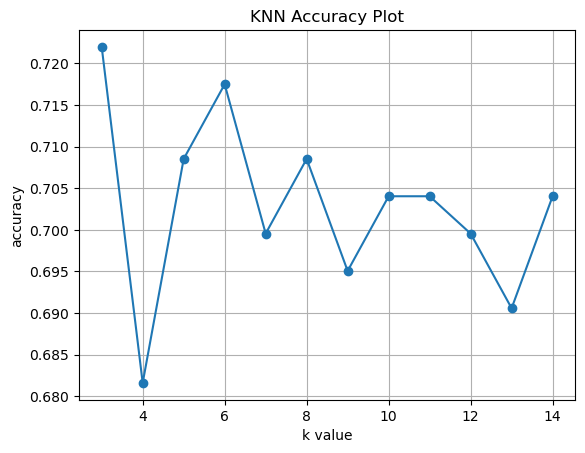

In [32]:
plt.plot(neighbors,metric,'o-')
plt.title('KNN Accuracy Plot')
plt.xlabel('k value')
plt.ylabel('accurracy)
plt.grid()           
           

# SVM model

In [35]:
from sklearn.svm import SVC
svmclf=SVC(kernel='linear')
svmclf.fit(x_train,y_train)

SVC(kernel='linear')

In [36]:
y_pred=svmclf.predict(x_test)

In [41]:
from sklearn.metrics import accuracy_score,confusion_matrix
print('Accuraccy is:',accuracy_score(y_test,y_pred) )

Accuraccy is: 0.7847533632286996


# 4. Do k-fold and stratified stratified k-fold cross validation techniques and find the


In [44]:
from sklearn.model_selection import cross_val_score,StratifiedKFold,KFold
k=5

In [49]:
k_fold_scores_knn=cross_val_score(classifier,x,y,cv=KFold(n_splits=k))
k_fold_scores_svm=cross_val_score(svmclf,x,y,cv=KFold(n_splits=k))

In [51]:
stratified_k_fold_scores_knn=cross_val_score(classifier,x,y,cv=KFold(n_splits=k))
stratified_k_fold_scores_svm=cross_val_score(svmclf,x,y,cv=KFold(n_splits=k))

In [52]:
average_accuracy_knn=k_fold_scores_knn.mean()
average_accuracy_svm=k_fold_scores_svm.mean()
average_accuracy_stratified_knn=stratified_k_fold_scores_knn.mean()
average_accuracy_stratified_svm=stratified_k_fold_scores_svm.mean()

In [53]:
print("Average  acccuracy(k_fold):")
print('KNN:',average_accuracy_knn)
print('SVM:',average_accuracy_svm)
print("Average  acccuracy(stratified_k_fold):")
print('KNN:',average_accuracy_stratified_knn)
print('SVM:',average_accuracy_stratified_svm)

Average  acccuracy(k_fold):
KNN: 0.7060259870692361
SVM: 0.7878475927437072
Average  acccuracy(stratified_k_fold):
KNN: 0.7060259870692361
SVM: 0.7878475927437072
